# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
telecom_users = pd.read_csv('telecom_users.csv') #Закачиваем датафрейм
telecom_users.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
telecom_users.columns.tolist() #присутствующий колонки

['Unnamed: 0',
 'customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
telecom_users.dtypes #тип данных

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
telecom_users.isnull().sum() # Пропущенные значения в столбцах
# Пропущенных значенией нет

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
telecom_users = telecom_users.drop(columns = ['Unnamed: 0'],axis = 1) # Уберем лишний столбец
telecom_users.head()
tel_user = telecom_users.astype('category') 
tel_user.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
#Приводим данные
tel_user = tel_user.drop(columns = ['customerID'], axis = 1)
tel_list = tel_user.columns.tolist()
tel_list
for i in tel_list:
    tel_user[i] = tel_user[i].cat.codes
us_list = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i in us_list:
    tel_user[i] = telecom_users[i]
#Устраняем пропуск в столбце
tel_user['TotalCharges'].where(~(tel_user.TotalCharges == ' '), other=0, inplace=True) 
tel_user.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.2,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.5,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.5,0


# 2. Исследование зависимостей и формулирование гипотез

<AxesSubplot:title={'center':'Поиск зависимости по оттоку клиентов'}>

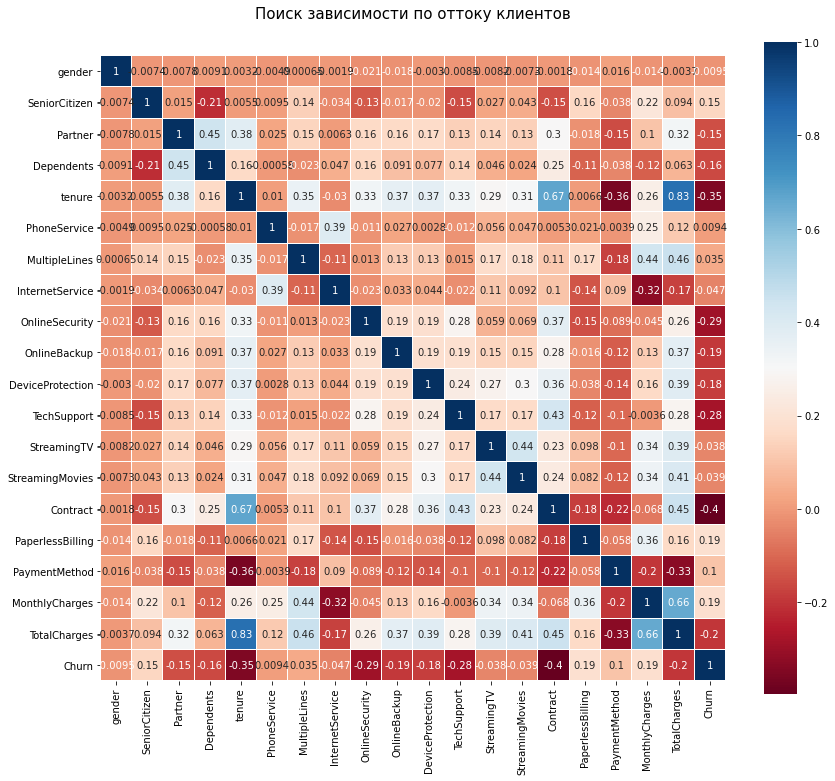

In [ ]:
# Строим тепловую карту, для поиска зависимости оnтока
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Поиск зависимости по оттоку клиентов', y=1.05, size=15)
sns.heatmap(tel_user.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)




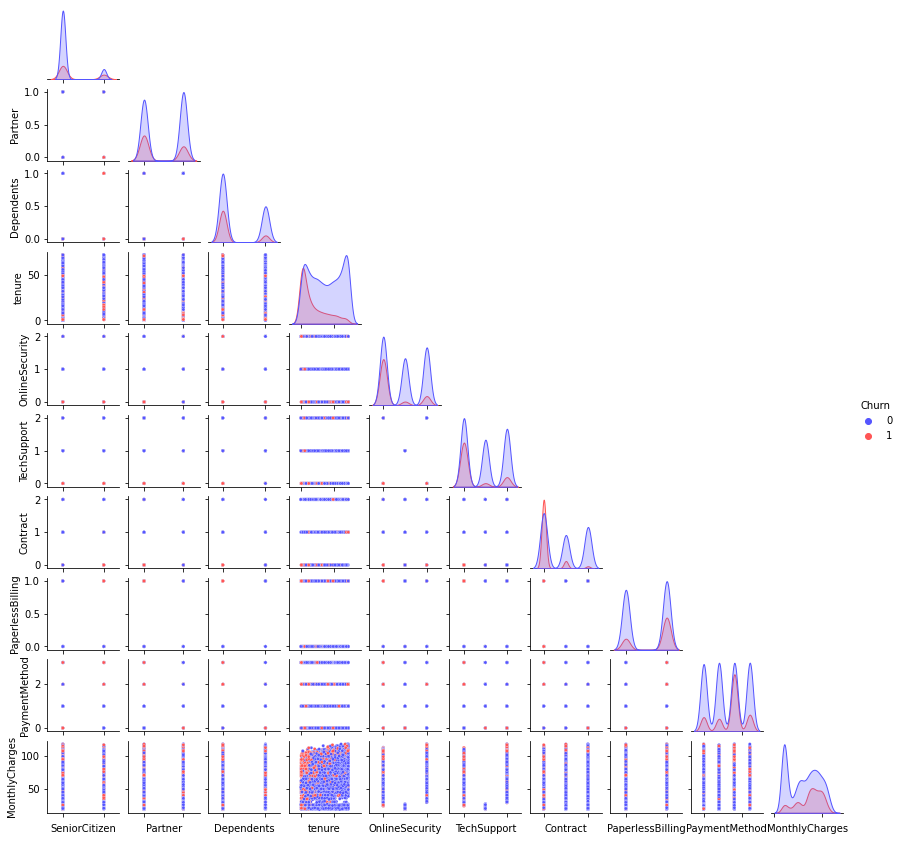

In [ ]:
#Отображаем наиболее влиятельные зависимости 
g = sns.pairplot(tel_user[[u'SeniorCitizen', u'Partner', u'Dependents', u'tenure', u'OnlineSecurity', u'TechSupport', 
                        u'Contract', u'PaperlessBilling', u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn']], 
                 hue='Churn', palette = 'seismic', height=1.2, plot_kws=dict(s=10), corner=True)
g.set(xticklabels=[])

Проанализировав графики прихожу к выводу что:
- В оттоке частично есть зависимость в продолжительности контрактов клиентов - в основном отточные клиенты берут непродолжительные контракты с помесячной оплатой
- При этом у отточных клиентов месячная оплата достаточно велика
- Большинство клиентов молодые и среди них большинство не отточные
- Большинство отточных клиентов не пользуются дополнительными сервисами, но пользуются бумажным биллингом 
- Основные методы оплаты отточных клиентов - электронный чек


# 3. Построение моделей для прогнозирования оттока

In [ ]:
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
#Разбиваем датасет на тестовый и тренировочный
x_trains, x_tests, y_trains, y_tests = train_test_split(tel_user.drop(['Churn'], axis=1), 
                                                    tel_user['Churn'],
                                                    train_size=0.8,
                                                    random_state=17)

In [ ]:
# параметры базовых алгоритмов
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=17)

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}
rfc = RandomForestClassifier(random_state=17)

lin_svc_params = {'C': np.arange(0.1, 1, 0.2)} #LinSVC
lin_svc = LinearSVC(random_state=17)

lr_params = {'C': np.arange(0.5, 1, 0.1)} #LogisticRegression
lr = LogisticRegression(random_state=17)

knn_params = {'n_neighbors': np.arange(1, 5, 1)} #KNeighborsClassifier
knn = KNeighborsClassifier()

skf = StratifiedKFold(n_splits=5, random_state=17)

In [ ]:
# Ищем параметры
gbc_gs = GridSearchCV(gbc, gbc_params, cv=skf)
rfc_gs = GridSearchCV(rfc, rfc_params, cv=skf)
lin_svc_gs = GridSearchCV(lin_svc, lin_svc_params, cv=skf)
lr_gs = GridSearchCV(lr, lr_params, cv=skf)
knn_gs = GridSearchCV(knn, knn_params, cv=skf)

In [ ]:
gbc_gs_f = gbc_gs.fit(x_trains, y_trains)
gbc_gs_f.best_params_

{'learning_rate': 0.1}

In [ ]:
rfc_gs_f = rfc_gs.fit(x_trains, y_trains)
rfc_gs_f.best_params_

{'min_samples_leaf': 2, 'n_estimators': 80}

In [ ]:
lin_svc_gs_f = lin_svc_gs.fit(x_trains, y_trains)
lin_svc_gs_f.best_params_

{'C': 0.30000000000000004}

In [ ]:
lr_gs_f = lr_gs.fit(x_trains, y_trains)
lr_gs_f.best_params_

{'C': 0.7}

In [ ]:
knn_gs_f = knn_gs.fit(x_trains, y_trains)
knn_gs_f.best_params_

{'n_neighbors': 4}

In [ ]:
xgb_params = {'n_estimators': range(10, 100, 5),
              'eta': np.arange(0.1, 1., .1),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)}

In [ ]:
models = [gbc_gs_f, rfc_gs_f, lin_svc_gs_f, lr_gs_f, knn_gs_f]
xgb_matr = np.empty((x_tests.shape[0], len(models)))
for n, model in enumerate(models):
    xgb_matr[:, n] = model.predict(x_tests)
xgb_grid = GridSearchCV(XGBClassifier(random_state=17), xgb_params,
                        cv=skf, n_jobs=-1, verbose=True)
xgb_fit = xgb_grid.fit(xgb_matr, y_tests)
print(f'Best params of XGBoost: {xgb_fit.best_params_}')

Fitting 5 folds for each of 7290 candidates, totalling 36450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4856 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 7056 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 9656 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 12656 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 16056 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 19856 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 24056 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 28656 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 33656 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 36450 out of 36450 | elapsed: 12.6min finished


[00:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best params of XGBoost: {'eta': 0.4, 'min_child_weight': 1, 'n_estimators': 40, 'subsample': 0.1}


In [ ]:
#Вводим лучшие параметры
gbc_gs = GradientBoostingClassifier(learning_rate=0.1, random_state=17)
rfc_gs = RandomForestClassifier(n_estimators=80, min_samples_leaf=2, random_state=17)
lin_svc_gs = LinearSVC(C=0.30000000000000004, random_state=17)
lr_gs = LogisticRegression(C=0.7, random_state=17)
knn_gs = KNeighborsClassifier(n_neighbors=4)

xgb_grid = XGBClassifier(n_estimators=40, eta=0.4, min_child_weight=1, subsample=0.1)

In [ ]:
#Проводим стэкинг
estimators = [
    ('rf', RandomForestClassifier(n_estimators=80, min_samples_leaf=2, random_state=17)),
    ('gb', GradientBoostingClassifier(learning_rate=0.1, random_state=17)),
    ('lr', LogisticRegression(C=0.7, random_state=17)),
    ('knn', KNeighborsClassifier(n_neighbors=4)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(C=0.30000000000000004, random_state=17)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=XGBClassifier(n_estimators=40, eta=0.4, min_child_weight=1, subsample=0.1)
)
clf_fit = clf.fit(x_trains, y_trains)   

[07:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# 4. Сравнение качества моделей 

In [ ]:
gbc_pred = gbc_gs_f.predict(x_tests)
report_gbc = classification_report(y_tests, gbc_pred)
print(report_gbc)
proba_gbc = gbc_gs_f.predict_proba(x_tests)
auc_gbc = roc_auc_score(y_tests, proba_gbc[:, 1])
print(auc_gbc)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       883
           1       0.66      0.50      0.57       315

    accuracy                           0.80      1198
   macro avg       0.75      0.70      0.72      1198
weighted avg       0.79      0.80      0.79      1198

0.8397148969062898


In [ ]:
rfc_pred = rfc_gs_f.predict(x_tests)
report_rfc = classification_report(y_tests, rfc_pred)
print(report_rfc)
proba_rfc = rfc_gs_f.predict_proba(x_tests)
auc_rfc = roc_auc_score(y_tests, proba_rfc[:, 1])
print(auc_rfc)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       883
           1       0.65      0.46      0.54       315

    accuracy                           0.79      1198
   macro avg       0.74      0.69      0.70      1198
weighted avg       0.78      0.79      0.78      1198

0.8308274461162344


In [ ]:
lin_svc_pred = lin_svc_gs_f.predict(x_tests)
report_lin_svc = classification_report(y_tests, lin_svc_pred)
print(report_lin_svc)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       883
           1       0.97      0.10      0.18       315

    accuracy                           0.76      1198
   macro avg       0.86      0.55      0.52      1198
weighted avg       0.81      0.76      0.68      1198



In [ ]:
lr_pred = lr_gs_f.predict(x_tests)
report_lr = classification_report(y_tests, lr_pred)
print(report_lr)
proba_lr = lr_gs_f.predict_proba(x_tests)
auc_lr = roc_auc_score(y_tests, proba_lr[:, 1])
print(auc_lr)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       883
           1       0.64      0.53      0.58       315

    accuracy                           0.80      1198
   macro avg       0.74      0.71      0.72      1198
weighted avg       0.79      0.80      0.79      1198

0.831749626993115


In [ ]:
knn_pred = knn_gs_f.predict(x_tests)
report_knn = classification_report(y_tests, knn_pred)
print(report_knn)
proba_knn = knn_gs_f.predict_proba(x_tests)
auc_knn = roc_auc_score(y_tests, proba_knn[:, 1])
print(auc_knn)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       883
           1       0.66      0.34      0.45       315

    accuracy                           0.78      1198
   macro avg       0.73      0.64      0.65      1198
weighted avg       0.76      0.78      0.75      1198

0.7358967445037661


In [ ]:
clf_pred = clf_fit.predict(x_tests)
report_clf = classification_report(y_tests, clf_pred)
print(report_clf)
proba_clf = clf_fit.predict_proba(x_tests)
auc_clf = roc_auc_score(y_tests, proba_clf[:, 1])
print(auc_clf)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       883
           1       0.57      0.47      0.52       315

    accuracy                           0.77      1198
   macro avg       0.70      0.67      0.68      1198
weighted avg       0.76      0.77      0.76      1198

0.7698250912293948


У всех моделей accuracy находится примерно около 0.8.
Если оценивать по F-мере отточных клиентов, то лучше показатель у LogisticRegression и GradientBoostingClassifier.
По метрике roc_auc лучше себя проявили GradientBoostingClassifier, LogisticRegression, RandomForestClassifier